# Effets fixes et aléatoires

- *Auteurs :* Cristian Preda, Quentin Grimonprez
- *Date :* 8 mars 2021

## Objectif du TP

L’objectif de ce TP est d'introduire les effets aléatoires dans un modèle d'analyse de la variance et plus généralement dans un modèle de régression. On fait appel à ce type d’effets (technique) dans le contexte des mesures répétées ou l'hypothèse d'indépendance des observations n'est plus valide. Nous allons illustrer cela de manière progressive à l'aide d’un exemple.

### Présentation du problème et des données.

Il s'agit de voir si le passage du sucre dans le sang (absorption) est différent chez les patients obèses et chez les patients contrôle (non-obèses). Pour cela, on réalise le plan d'expérience suivant : on forme un échantillon aléatoire de 13 patients obèses et un échantillon aléatoire de 20 patients contrôle. À chaque patient, on administre une quantité fixée de sucre (10 mg) et on regarde ensuite la glycémie (unité de mesure non-précisée) à 8 instants de temps différents : à t 0 = 0 (avant la dose du sucre), à t_1 = 0.5 heures après la prise de sucre, puis à t_2 = 1h, t_3 = 1.5h, t_4 = 2h, t_5 = 3h, t_6 = 4h et t_7 = 5h.

La base de données est disponible en format csv (séparateur ";") à l’adresse : <http://math.univ-lille1.fr/~preda/GIS5/glycemie.csv>.
Remarquez la présence d'un en-tête pour les noms de variables dont un identificateur pour chaque patient
(id). Pour des raisons qui seront évidentes plus tard, n'utilisez pas cette colonne comme row.names lors de la lecture des données.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # API classique
import statsmodels.formula.api as smf  # API avec des formules
from scipy.stats import ranksums, shapiro, ttest_ind, norm

plt.rcParams["figure.figsize"] = 12, 8

In [2]:
glycemie = pd.read_table("data/glycemie.csv", sep=";", dtype={"id": str})
glycemie

,groupe,id,t0,t1,t2,t3,t4,t5,t6,t7
0,control,1,4.3,3.3,3.0,2.6,2.2,2.5,3.4,4.4
1,control,2,3.7,2.6,2.6,1.9,2.9,3.2,3.1,3.9
2,control,3,4.0,4.1,3.1,2.3,2.9,3.1,3.9,4.0
3,control,4,3.6,3.0,2.2,2.8,2.9,3.9,3.8,4.0
4,control,5,4.1,3.8,2.1,3.0,3.6,3.4,3.6,3.7
5,control,6,3.8,2.2,2.0,2.6,3.8,3.6,3.0,3.5
6,control,7,3.8,3.0,2.4,2.5,3.1,3.4,3.5,3.7
7,control,8,4.4,3.9,2.8,2.1,3.6,3.8,4.0,3.9
8,control,9,5.0,4.0,3.4,3.4,3.3,3.6,4.0,4.3
9,control,10,3.7,3.1,2.9,2.2,1.5,2.3,2.7,2.8





Voici quelques tâches qui vous sont demandées :

1. Statistiques descriptives pour chaque variable temps.
Préciser notamment la moyenne et l’écart-type.
1. Représentation graphique des données.
1. Comparaison des deux groupes par l'évolution moyenne de la glycémie.
1. Les premiers tests statistiques pour comparer les groupes.
Pour chaque temps, comparer les deux groupes selon le niveau moyen de la glycémie.
Note : Selon que l'hypothèse de normalité des données est vérifiée (à l'aide du test de Shapiro), on utilisera le test de Student, ou, dans le cas contraire, le test de Wilcoxon. Pour rappel, les tests de Student et Wilcoxon permettent de vérifier l'hypothèse nulle selon laquelle les deux groupes ont la même espérance de la glycémie. Le test de Wilcoxon est un test non-paramétrique - c'est-à-dire que son utilisation n'est pas conditionnée par la loi des données.
Au vu des résultats numériques (et graphiques) il y a donc des différences significatives entre les deux groupes. Allons plus en détail.


### Statistiques descriptives

In [3]:
glycemie.describe(include="all")

,groupe,id,t0,t1,t2,t3,t4,t5,t6,t7
count,33,33,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
unique,2,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,control,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.357576,3.793939,3.363636,3.145455,3.136364,3.363636,3.624242,3.984848
std,NaN,NaN,0.708886,0.859120,0.806930,0.731476,0.713187,0.689120,0.633951,0.575066
min,NaN,NaN,3.000000,2.200000,2.000000,1.900000,1.500000,1.900000,2.300000,2.700000
25%,NaN,NaN,3.800000,3.100000,2.900000,2.600000,2.800000,3.100000,3.200000,3.700000
50%,NaN,NaN,4.400000,3.900000,3.200000,3.100000,3.200000,3.600000,3.600000,3.900000
75%,NaN,NaN,4.800000,4.300000,3.900000,3.700000,3.700000,3.900000,4.000000,4.300000


In [4]:
glycemie.groupby("groupe").describe().T

groupe      control      obese
t0 count  20.000000  13.000000
   mean    4.150000   4.676923
   std     0.515548   0.858442
   min     3.100000   3.000000
   25%     3.700000   4.400000
...             ...        ...
t7 min     2.700000   3.300000
   25%     3.675000   3.700000
   50%     3.950000   3.900000
   75%     4.325000   4.300000
   max     5.000000   4.900000

[64 rows x 2 columns]

In [5]:
pd.set_option("display.max_rows", 64)
glycemie.groupby("groupe").describe().T

groupe      control      obese
t0 count  20.000000  13.000000
   mean    4.150000   4.676923
   std     0.515548   0.858442
   min     3.100000   3.000000
   25%     3.700000   4.400000
   50%     4.200000   4.800000
   75%     4.450000   4.900000
   max     5.000000   6.600000
t1 count  20.000000  13.000000
   mean    3.505000   4.238462
   std     0.747258   0.854925
   min     2.200000   2.500000
   25%     3.075000   4.000000
   50%     3.300000   4.300000
   75%     3.925000   4.600000
   max     5.000000   6.100000
t2 count  20.000000  13.000000
   mean    2.950000   4.000000
   std     0.541441   0.740495
   min     2.000000   2.300000
   25%     2.600000   3.800000
   50%     3.000000   4.000000
   75%     3.225000   4.600000
   max     4.100000   5.200000
t3 count  20.000000  13.000000
   mean    2.785000   3.700000
   std     0.529424   0.658281
   min     1.900000   2.200000
   25%     2.450000   3.400000
   50%     2.700000   3.800000
   75%     3.125000   4.100000
   max     3.900000   4.600000
t4 count  20.000000  13.000000
   mean    3.000000   3.346154
   std     0.622389   0.815082
   min     1.500000   2.100000
   25%     2.825000   2.800000
   50%     3.000000   3.400000
   75%     3.600000   3.800000
   max     3.800000   4.700000
t5 count  20.000000  13.000000
   mean    3.300000   3.461538
   std     0.715983   0.661486
   min     1.900000   2.300000
   25%     2.950000   3.100000
   50%     3.400000   3.700000
   75%     3.825000   4.000000
   max     4.300000   4.200000
t6 count  20.000000  13.000000
   mean    3.565000   3.715385
   std     0.669859   0.588566
   min     2.300000   2.500000
   25%     3.100000   3.500000
   50%     3.600000   3.800000
   75%     3.925000   4.200000
   max     4.800000   4.700000
t7 count  20.000000  13.000000
   mean    3.960000   4.023077
   std     0.608190   0.541839
   min     2.700000   3.300000
   25%     3.675000   3.700000
   50%     3.950000   3.900000
   75%     4.325000   4.300000
   max     5.000000   4.900000

### Représentation graphique

Nous allons mettre en forme les données pour faire plus facilement nos analyses et graphes dans la suite. Pour cela, nous devons créer une variable contenant l'ensemble des temps et une contenant la valeur de glycémie. La méthode melt permet de transformer un DataFrame en un nouveau avec des colonnes d'identifiants choisies. Toutes les autres colonnes seront combinées en 2 colonnes : variable et value.

In [6]:
df_melted = glycemie.melt(id_vars=["id", "groupe"])
df_melted

,id,groupe,variable,value
0,1,control,t0,4.3
1,2,control,t0,3.7
2,3,control,t0,4.0
3,4,control,t0,3.6
4,5,control,t0,4.1
...,...,...,...,...
259,29,obese,t7,3.9
260,30,obese,t7,4.8
261,31,obese,t7,3.5
262,32,obese,t7,3.3


In [7]:
dict_temps = {"t0": 0, "t1": 0.5, "t2": 1, "t3": 1.5, "t4": 2, "t5": 3, "t6": 4, "t7": 5}
df_melted["time"] = df_melted["variable"]
df_melted["time"].replace(dict_temps, inplace=True)
df_melted.sort_values(["id", "time"], inplace=True)
df_melted

,id,groupe,variable,value,time
0,1,control,t0,4.3,0.0
33,1,control,t1,3.3,0.5
66,1,control,t2,3.0,1.0
99,1,control,t3,2.6,1.5
132,1,control,t4,2.2,2.0
...,...,...,...,...,...
107,9,control,t3,3.4,1.5
140,9,control,t4,3.3,2.0
173,9,control,t5,3.6,3.0
206,9,control,t6,4.0,4.0


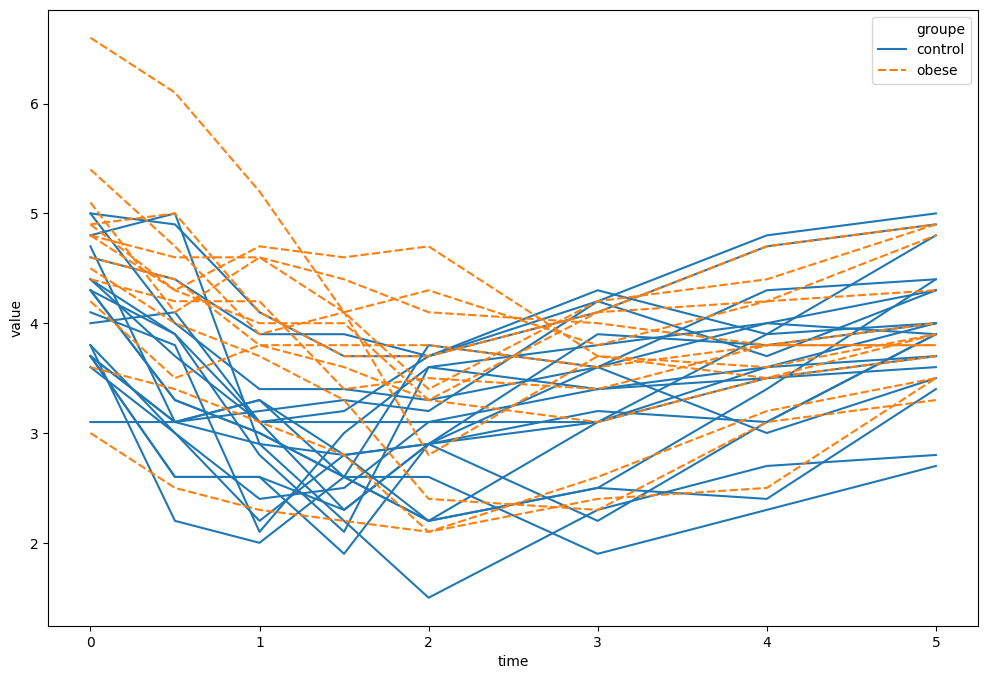

In [8]:
sns.lineplot(data=df_melted, x="time", y="value", units="id", hue="groupe", style="groupe", estimator=None)
plt.show()

### Comparaison des deux groupes par l'évolution moyenne de la glycémie

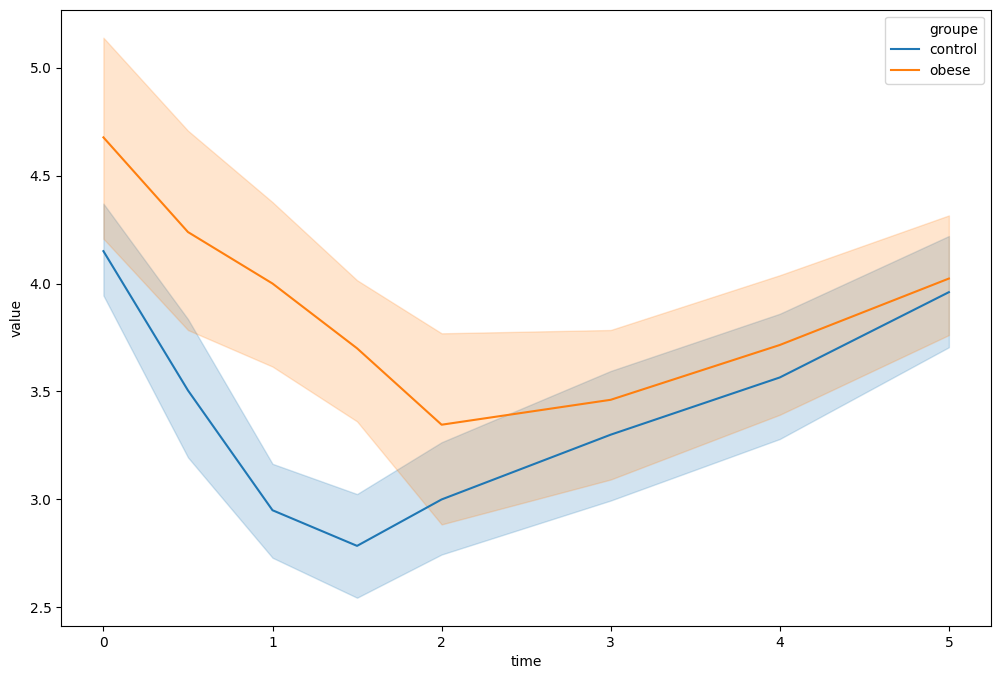

In [9]:
sns.lineplot(data=df_melted, x="time", y="value", hue="groupe", estimator="mean", ci=95)
plt.show()

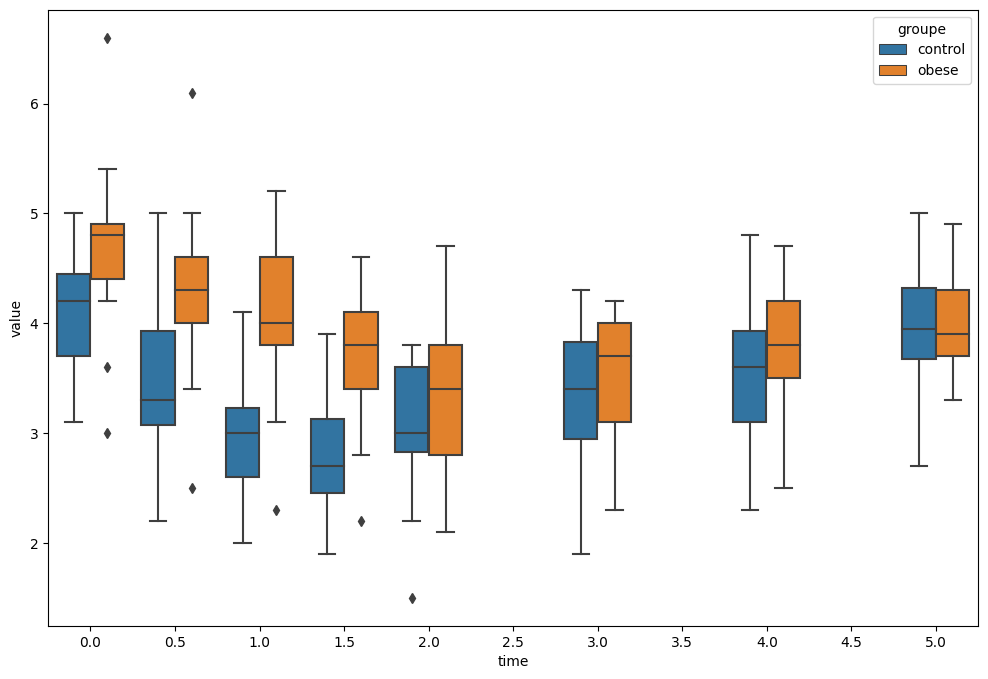

In [10]:
sns.boxplot(data=df_melted, x="time", y="value", hue="groupe", order=np.arange(0, 5.1, 0.5))
plt.show()

### Les premiers tests statistiques pour comparer les groupes

Nous comparons l'effet moyen de chaque groupe pour chaque instant de temps. On effectue d'abord un test de Shapiro (`shapiro`) pour tester la normalité des données puis un test de Student (`ttest_ind`) ou un test de Wilcoxon (`ranksums`) selon le résultat du test de Shapiro.

In [11]:
pval = np.zeros(8)

for i in range(len(pval)):
    var = "t" + str(i)
    shap_control = shapiro(glycemie[var][glycemie["groupe"] == "control"])
    shap_obese = shapiro(glycemie[var][glycemie["groupe"] == "obese"])

    if (shap_control.pvalue > 0.05) & (shap_obese.pvalue > 0.05):
        pval[i] = ttest_ind(glycemie[var][glycemie["groupe"] == "control"], glycemie[var][glycemie["groupe"] == "obese"]).pvalue
    else:
        pval[i] = ranksums(glycemie[var][glycemie["groupe"] == "control"], glycemie[var][glycemie["groupe"] == "obese"]).pvalue

In [12]:
pval

array([3.46711090e-02, 1.40254157e-02, 4.95542967e-05, 1.16304398e-04,
       1.76977738e-01, 5.19180773e-01, 5.14157990e-01, 7.63550232e-01])

In [13]:
pval < 0.05

array([ True,  True,  True,  True, False, False, False, False])

L'hypothèse d'égalité des moyennes est rejetée pour les 4 premiers temps.

Au vu des résultats numériques (et graphiques) il y a donc des différences significatives entre les deux groupes. Allons plus en détail.

### Un modèle de régression quadratique 

L'évolution de la glycémie en fonction du temps semble une fonction quadratique, c’est à dire une courbe (parabole) en "U" :

y(t) = a + bt + ct^2 + ε

avec a, b et c des coefficients et ε une erreur aléatoire.

Estimons un modèle de régression quadratique pour chaque groupe séparément. La variable explicative est donc le temps.

Dans l'API de statsmodels avec des formules, les fonctions ont le même nom que dans l'API classique mais écrit en minuscule.

In [14]:
mod_control = smf.ols("value ~ time + np.power(time, 2)", data=df_melted[df_melted["groupe"] == "control"])
res_control = mod_control.fit()
res_control.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.14
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           8.38e-12
Time:                        17:49:27   Log-Likelihood:                -157.21
No. Observations:                 160   AIC:                             320.4
Df Residuals:                     157   BIC:                             329.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.8811      0.114     34.114      0.000       3.656       4.106
time                 -0.8051      0.116     -6.926      0.000      -1.035      -0.576
np.power(time, 2)     0.1714      0.022      7.618      0.000       0.127       0.216
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.640
Skew:                           0.027   Prob(JB):                        0.440
Kurtosis:                       2.507   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous testons la normalité des résidus avec le test de Shapiro.

In [15]:
shapiro(res_control.resid)

ShapiroResult(statistic=0.9921519160270691, pvalue=0.5321125984191895)

La p-valeur est > 0.05, on ne rejette donc pas l'hypothèse nulle de normalité des résidus.

Nous testons l'homoscédasticité des résidus avec le test de Breusch-Pagan.

In [16]:
sm.stats.het_breuschpagan(res_control.resid, res_control.model.exog)

(0.5068825072007854, 0.7761253381551653, 0.2494795853310602, 0.779514499414012)

La fonction effectue 2 tests. Le 1er correspond à celui fait en R. Le 1er élément est la statistique de test, le 2ème la p-valeur. Ici on ne rejette pas l'hypothèse nulle d'homoscédasticité des résidus.

Nous testons l'autocorrélation des résidus avec le test de Durbin-Watson. Dans statsmodels, il existe une fonction pour calculer la statistique de test mais pas la p-valeur, nous créons donc cette fonction.

In [17]:
def dw_test(X, residuals):
    """ Test de Durbin-Watson

    Parameters
    ----------
    X : array-like
        Matrice de design de la régression
    residuals : array-like
        Vecteur des résidus de la régression

    Returns
    -------
    tuple
        Statistique de test, p-valeur
    """
    dw = np.sum(np.square(np.diff(residuals)))/np.sum(np.square(residuals))
    n, k = X.shape
    AX = X[:-2, ] * -1 + X[1:-1, ] * 2 + X[2:, ] * -1
    AX = np.vstack((X[0, :] - X[1, :], AX, X[-1, :] - X[-2, :]))
    _, r = np.linalg.qr(X)
    Q1 = np.linalg.inv(np.matmul(r.T, r))
    XAXQ = np.matmul(np.matmul(X.T, AX), Q1)
    P = 2 * (n - 1) - XAXQ.trace()
    Q = 2 * (3 * n - 4) - 2 * np.matmul(np.matmul(AX.T, AX), Q1).trace() + np.matmul(XAXQ, XAXQ).trace()
    dmean = P/(n - k)
    dvar = 2/((n - k) * (n - k + 2)) * (Q - P * dmean)
    pval = norm.cdf(dw, dmean, np.sqrt(dvar))

    return dw, pval

On crée la matrice X qui contient une colonne de 1, le temps et le temps au carré (matrice de design de notre régression).

In [18]:
X = np.stack((np.ones(len(df_melted[df_melted["groupe"] == "control"])),
              df_melted[df_melted["groupe"] == "control"]["time"],
              df_melted[df_melted["groupe"] == "control"]["time"] ** 2), axis=1)

In [19]:
dw_test(X, res_control.resid)

(0.8700764537276818, 2.258372712745064e-13)

La p-valeur est inférieure à 0.05, on rejette l'hypothèse nulle de non autocorrélation. On a donc un problème d’autocorrélation des résidus! Corrélation due au temps!

On peut faire le même travail avec le groupe obèse.

In [20]:
mod_obese = smf.ols("value ~ time + np.power(time, 2)", data=df_melted[df_melted["groupe"] == "obese"])
res_obese = mod_obese.fit()
res_obese.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     16.20
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           7.89e-07
Time:                        17:49:27   Log-Likelihood:                -110.55
No. Observations:                 104   AIC:                             227.1
Df Residuals:                     101   BIC:                             235.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6562      0.154     30.288      0.000       4.351       4.961
time                 -0.8712      0.157     -5.547      0.000      -1.183      -0.560
np.power(time, 2)     0.1517      0.030      4.991      0.000       0.091       0.212
==============================================================================
Omnibus:                        2.125   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.542
Skew:                          -0.220   Prob(JB):                        0.463
Kurtosis:                       3.402   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
shapiro(res_obese.resid)

ShapiroResult(statistic=0.9781584739685059, pvalue=0.08322436362504959)

In [22]:
sm.stats.het_breuschpagan(res_obese.resid, res_obese.model.exog)

(2.9578583310329707,
 0.22788158123141172,
 1.4783123481936398,
 0.23291356351270606)

In [23]:
X = np.stack((np.ones(len(df_melted[df_melted["groupe"] == "obese"])),
              df_melted[df_melted["groupe"] == "obese"]["time"],
              df_melted[df_melted["groupe"] == "obese"]["time"] ** 2), axis=1)
dw_test(X, res_obese.resid)

(0.5326766146928679, 1.4091209326309271e-14)

Traçons les deux fonctions de régression sur le même graphique.

In [24]:
pred_control = res_control.predict(pd.DataFrame({"time": list(dict_temps.values())}))
pred_obese = res_obese.predict(pd.DataFrame({"time": list(dict_temps.values())}))

In [25]:
pred_control

0    3.881115
1    3.521394
2    3.247353
3    3.058992
4    2.956309
5    3.007982
6    3.402373
7    4.139481
dtype: float64

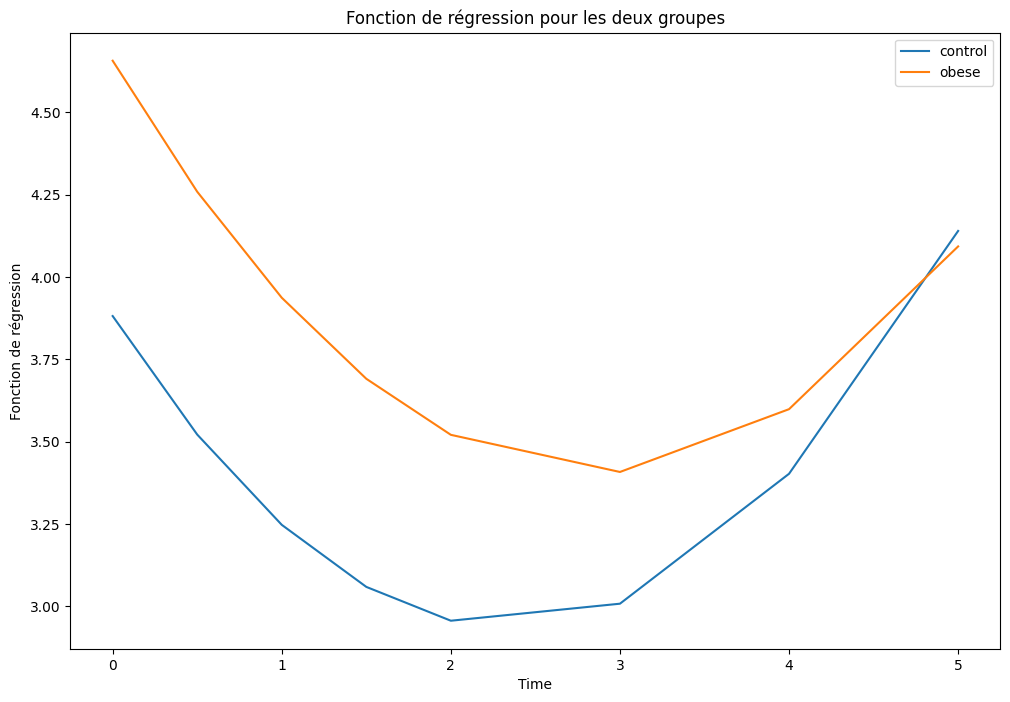

In [26]:
ax = sns.lineplot(x=list(dict_temps.values()), y=pred_control, label="control")
sns.lineplot(x=list(dict_temps.values()), y=pred_obese, label="obese", ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Fonction de régression")
ax.set_title("Fonction de régression pour les deux groupes")
ax.legend()
plt.show()

Comparaison des fonctions de régression :

In [27]:
res_control.params

Intercept            3.881115
time                -0.805120
np.power(time, 2)    0.171359
dtype: float64

In [28]:
res_obese.params

Intercept            4.656199
time                -0.871185
np.power(time, 2)    0.151689
dtype: float64

On teste un autre modèle en y incorporant la variable groupe.

In [29]:
mod = smf.ols("value ~ groupe * (time + np.power(time, 2))", data=df_melted)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     25.11
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.30e-20
Time:                        17:49:28   Log-Likelihood:                -268.17
No. Observations:                 264   AIC:                             548.3
Df Residuals:                     258   BIC:                             569.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.8811      0.118     32.931      0.000       3.649       4.113
groupe[T.obese]                       0.7751      0.188      4.128      0.000       0.405       1.145
time                                 -0.8051      0.120     -6.686      0.000      -1.042      -0.568
groupe[T.obese]:time                 -0.0661      0.192     -0.344      0.731      -0.444       0.312
np.power(time, 2)                     0.1714      0.023      7.354      0.000       0.125       0.217
groupe[T.obese]:np.power(time, 2)    -0.0197      0.037     -0.530      0.597      -0.093       0.053
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.349
Skew:                          -0.085   Prob(JB):                        0.840
Kurtosis:                       2.949   Cond. No.                         84.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`groupe[T.obese]` est une constante présente uniquement pour le groupe obèse. Donc, la constante pour une personne du groupe contrôle est 3.8811 et pour celle du groupe obèse 3.8811+0.7751=4.6562. Pareil pour les variables associées aux temps et aux carrés du temps. À peu de choses près, on obtient les 2 modèles précédents réunis en un seul.

In [30]:
shapiro(res.resid)

ShapiroResult(statistic=0.9954620599746704, pvalue=0.6339918971061707)

In [31]:
sm.stats.het_breuschpagan(res.resid, res.model.exog)

(5.609310466619119, 0.346108405590119, 1.120165825634961, 0.3500090415400841)

In [32]:
X = sm.add_constant(pd.DataFrame({"time": df_melted["time"], "residuals": res.resid}))
resid = smf.ols("residuals ~ time", data=X).fit().resid
dw_test(X.values, resid)

(0.7245727321282358, 7.142407484359622e-26)

Pour résoudre le problème d'autocorrélation, nous allons faire un modèle mixte. On commence avec la variante la plus simple : intercept aléatoire.

Nos groupes sont les individus, l'effet aléatoire (`re_formula`) est 1 (intercept).

In [33]:
mod_mixte1 = smf.mixedlm("value ~ groupe * (time + np.power(time, 2))", df_melted, re_formula="1", groups=df_melted["id"])
res_mixte1 = mod_mixte1.fit()
res_mixte1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:                   MixedLM        Dependent Variable:        value    
No. Observations:        264            Method:                    REML     
No. Groups:              33             Scale:                     0.2047   
Min. group size:         8              Log-Likelihood:            -216.2237
Max. group size:         8              Converged:                 Yes      
Mean group size:         8.0                                                
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                          3.881    0.139 27.908 0.000  3.609  4.154
groupe[T.obese]                    0.775    0.222  3.498 0.000  0.341  1.209
time                              -0.805    0.081 -9.989 0.000 -0.963 -0.647
groupe[T.obese]:time              -0.066    0.128 -0.514 0.607 -0.318  0.186
np.power(time, 2)                  0.171    0.016 10.987 0.000  0.141  0.202
groupe[T.obese]:np.power(time, 2) -0.020    0.025 -0.792 0.429 -0.068  0.029
Group Var                          0.262    0.172                           
============================================================================

"""

Les effets aléatoires :

In [34]:
res_mixte1.random_effects

{'1': Group   -0.172543
 dtype: float64,
 '10': Group   -0.685047
 dtype: float64,
 '11': Group   -0.445878
 dtype: float64,
 '12': Group    0.442462
 dtype: float64,
 '13': Group    0.283016
 dtype: float64,
 '14': Group   -0.400322
 dtype: float64,
 '15': Group    0.898021
 dtype: float64,
 '16': Group    0.829687
 dtype: float64,
 '17': Group    0.112181
 dtype: float64,
 '18': Group   -0.639491
 dtype: float64,
 '19': Group    0.078014
 dtype: float64,
 '2': Group   -0.377544
 dtype: float64,
 '20': Group    0.100792
 dtype: float64,
 '21': Group    0.072714
 dtype: float64,
 '22': Group   -1.111739
 dtype: float64,
 '23': Group    0.44855
 dtype: float64,
 '24': Group    0.357439
 dtype: float64,
 '25': Group   -0.029787
 dtype: float64,
 '26': Group    0.220771
 dtype: float64,
 '27': Group    0.414383
 dtype: float64,
 '28': Group    0.334661
 dtype: float64,
 '29': Group   -0.257566
 dtype: float64,
 '3': Group    0.02107
 dtype: float64,
 '30': Group    0.904109
 dtype: float6

On vérifie que les effets aléatoires ont bien une moyenne nulle

In [35]:
np.mean(list(res_mixte1.random_effects.values()))

2.0455018150669552e-15

La matrice de covariance des effets aléatoires

In [36]:
res_mixte1.cov_re

,Group
Group,0.262334


In [37]:
shapiro(res_mixte1.resid)

ShapiroResult(statistic=0.9968621730804443, pvalue=0.8855305314064026)

In [38]:
X = sm.add_constant(pd.DataFrame({"time": df_melted["time"], "residuals": res_mixte1.resid}))
resid = smf.ols("residuals ~ time", data=X).fit().resid
dw_test(X.values, resid)

(1.4780358084308232, 9.060999243561599e-06)

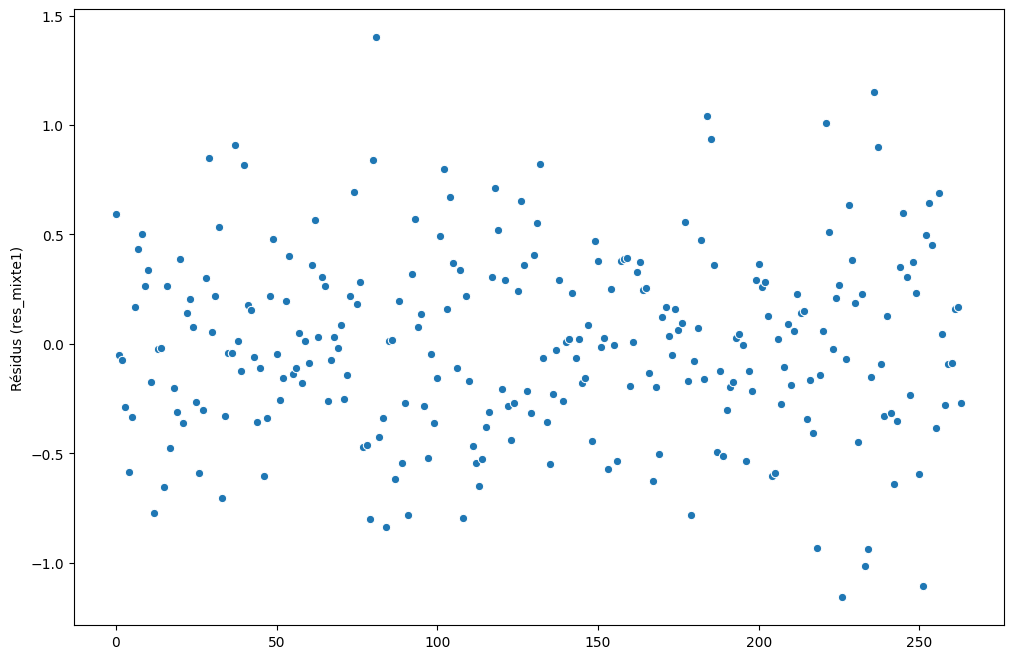

In [39]:
ax = sns.scatterplot(x=range(len(res_mixte1.resid)), y=res_mixte1.resid)
ax.set_ylabel("Résidus (res_mixte1)")
plt.show()

Réalisons un modèle mixte basé sur notre modèle quadratique avec intercept et pente aléatoires

In [40]:
mod_mixte2 = smf.mixedlm("value ~ groupe * (time + np.power(time, 2))", df_melted, re_formula="time", groups=df_melted["id"])
res_mixte2 = mod_mixte2.fit()
res_mixte2.summary()

/home/quentin/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                    MixedLM        Dependent Variable:        value    
No. Observations:         264            Method:                    REML     
No. Groups:               33             Scale:                     0.1759   
Min. group size:          8              Log-Likelihood:            -211.0955
Max. group size:          8              Converged:                 Yes      
Mean group size:          8.0                                                
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          3.881    0.149  25.990 0.000  3.588  4.174
groupe[T.obese]                    0.775    0.238   3.258 0.001  0.309  1.241
time                              -0.805    0.078 -10.329 0.000 -0.958 -0.652
groupe[T.obese]:time              -0.066    0.124  -0.532 0.595 -0.309  0.177
np.power(time, 2)                  0.171    0.014  11.852 0.000  0.143  0.200
groupe[T.obese]:np.power(time, 2) -0.020    0.023  -0.854 0.393 -0.065  0.025
Group Var                          0.339    0.259                            
Group x time Cov                  -0.028    0.043                            
time Var                           0.010    0.012                            
=============================================================================

"""

In [41]:
res_mixte2.random_effects

{'1': Group   -0.202766
 time     0.012898
 dtype: float64,
 '10': Group   -0.512104
 time    -0.083301
 dtype: float64,
 '11': Group   -0.525072
 time     0.033831
 dtype: float64,
 '12': Group    0.318413
 time     0.059472
 dtype: float64,
 '13': Group    0.245271
 time     0.018939
 dtype: float64,
 '14': Group   -0.177288
 time    -0.104684
 dtype: float64,
 '15': Group    0.959431
 time    -0.023098
 dtype: float64,
 '16': Group    0.760310
 time     0.036568
 dtype: float64,
 '17': Group    0.189944
 time    -0.035069
 dtype: float64,
 '18': Group   -0.412439
 time    -0.107887
 dtype: float64,
 '19': Group    0.356421
 time    -0.127393
 dtype: float64,
 '2': Group   -0.516174
 time     0.061510
 dtype: float64,
 '20': Group   -0.123065
 time     0.103361
 dtype: float64,
 '21': Group    0.267341
 time    -0.088954
 dtype: float64,
 '22': Group   -1.494142
 time     0.169273
 dtype: float64,
 '23': Group    0.296981
 time     0.072143
 dtype: float64,
 '24': Group    0.494640
 

On vérifie que les effets aléatoires ont bien une moyenne nulle

In [42]:
np.mean(list(res_mixte2.random_effects.values()), axis=0)

array([ 8.40068755e-15, -1.39114309e-15])

La matrice de covariance des effets aléatoires

In [43]:
res_mixte2.cov_re

,Group,time
Group,0.339028,-0.027678
time,-0.027678,0.009864


In [44]:
X = sm.add_constant(pd.DataFrame({"time": df_melted["time"], "residuals": res_mixte2.resid}))
resid = smf.ols("residuals ~ time", data=X).fit().resid
dw_test(X.values, resid)

(1.7512764940070507, 0.02003068466054412)

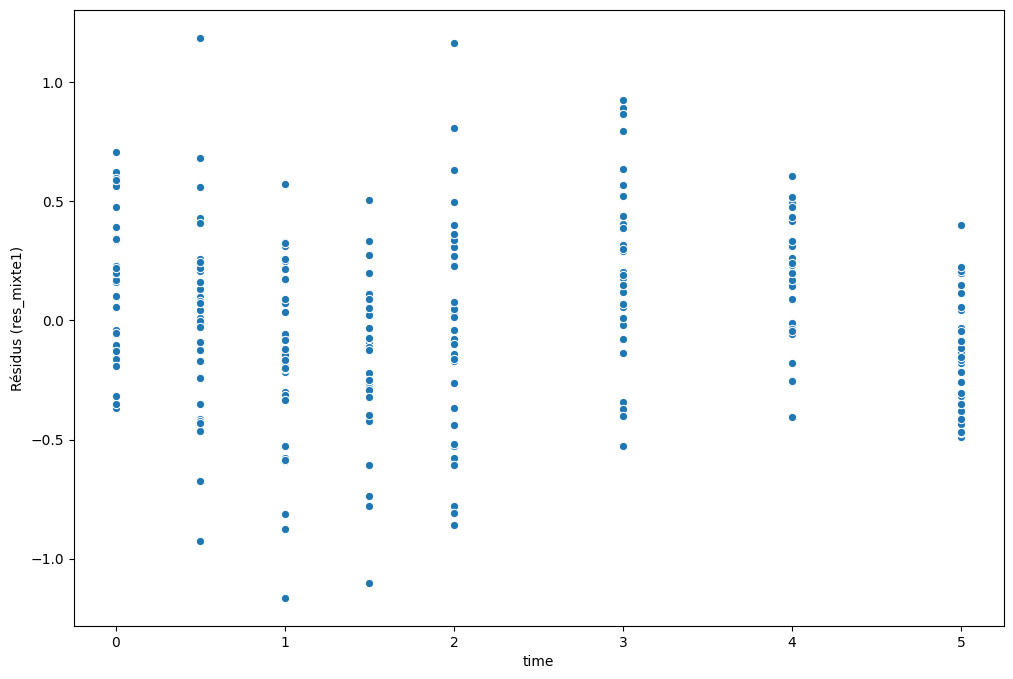

In [45]:
ax = sns.scatterplot(x=df_melted["time"], y=res_mixte2.resid)
ax.set_ylabel("Résidus (res_mixte1)")
plt.show()

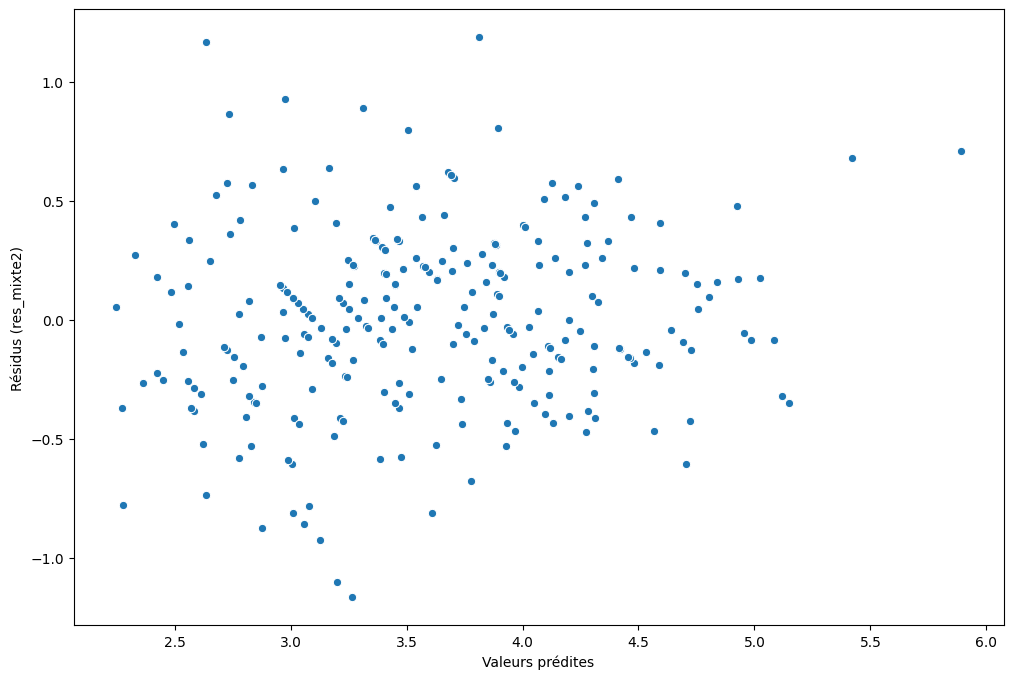

In [46]:
ax = sns.scatterplot(x=res_mixte2.fittedvalues, y=res_mixte2.resid)
ax.set_xlabel("Valeurs prédites")
ax.set_ylabel("Résidus (res_mixte2)")
plt.show()